# Stock Market Prediction

In [4]:
# Import the libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [10]:
ticker = "MSFT"

start_date = "2010-01-01"
end_date = "2018-12-31"

# Get the number of rows and columns in the data set
df = data.DataReader(ticker, "yahoo", start_date, end_date)
print(df)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2010-01-04   31.100000   30.590000   30.620001   30.950001  38409100.0   
2010-01-05   31.100000   30.639999   30.850000   30.959999  49749600.0   
2010-01-06   31.080000   30.520000   30.879999   30.770000  58182400.0   
2010-01-07   30.700001   30.190001   30.629999   30.450001  50559700.0   
2010-01-08   30.879999   30.240000   30.280001   30.660000  51197400.0   
...                ...         ...         ...         ...         ...   
2018-12-24   97.970001   93.980003   97.680000   94.129997  43935200.0   
2018-12-26  100.690002   93.959999   95.139999  100.559998  51634800.0   
2018-12-27  101.190002   96.400002   99.300003  101.180000  49498500.0   
2018-12-28  102.410004   99.519997  102.089996  100.389999  38196300.0   
2018-12-31  102.400002  100.440002  101.290001  101.570000  33173800.0   

            Adj Close  
Date         

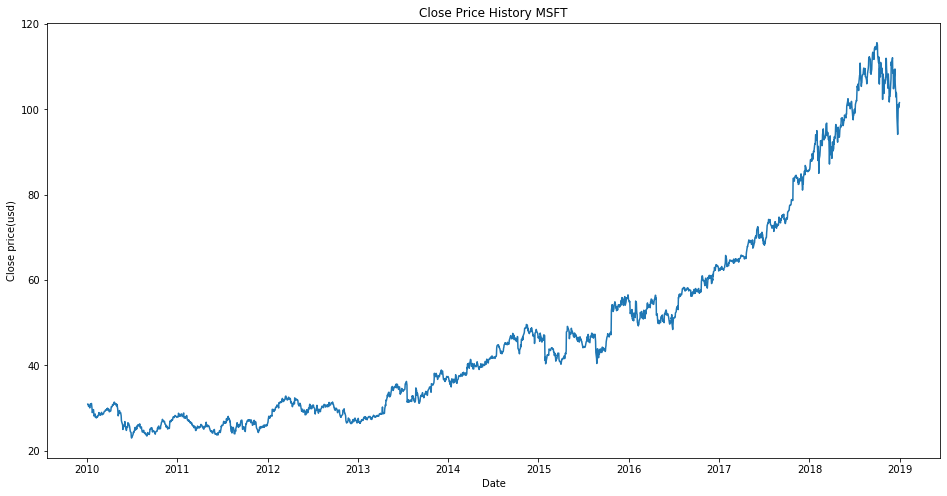

In [6]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.plot(df["Close"])
plt.title("Close Price History "+ticker)
plt.xlabel("Date")
plt.ylabel("Close price(usd)")
plt.show()

In [7]:
# Create a new dataframe with only the close column
dataset = df.filter(["Close"])

# Get the number of rows of train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

In [8]:
# Number of backtesting
bt=90

In [12]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(bt, len(train_data)):
    x_train.append(train_data[i-bt:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print("x_train:", x_train)
print("y_train:", y_train)

x_train: [[0.08574515 0.08585312 0.0838013  ... 0.06403888 0.06339092 0.06943845]
 [0.08585312 0.0838013  0.08034558 ... 0.06339092 0.06943845 0.06727861]
 [0.0838013  0.08034558 0.08261339 ... 0.06943845 0.06727861 0.06393089]
 ...
 [0.39859609 0.3973002  0.39330453 ... 0.4533477  0.45053999 0.45269978]
 [0.3973002  0.39330453 0.39092871 ... 0.45053999 0.45269978 0.45032396]
 [0.39330453 0.39092871 0.38552914 ... 0.45269978 0.45032396 0.44708427]]
y_train [0.06727861 0.06393089 0.06403888 ... 0.45032396 0.44708427 0.45075594]


## MODEL

In [16]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, input_dim=bt, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="tanh"))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# train the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1722/1722 [==============================] - 0s 164us/step - loss: 5.7859e-04
Epoch 2/100
1722/1722 [==============================] - 0s 28us/step - loss: 2.7513e-04
Epoch 3/100
1722/1722 [==============================] - 0s 22us/step - loss: 2.2250e-04
Epoch 4/100
1722/1722 [==============================] - 0s 23us/step - loss: 2.2849e-04
Epoch 5/100
1722/1722 [==============================] - 0s 24us/step - loss: 1.9952e-04
Epoch 6/100
1722/1722 [==============================] - 0s 24us/step - loss: 2.0049e-04
Epoch 7/100
1722/1722 [==============================] - 0s 23us/step - loss: 1.7499e-04
Epoch 8/100
1722/1722 [==============================] - 0s 23us/step - loss: 2.0625e-04
Epoch 9/100
1722/1722 [==============================] - 0s 23us/step - loss: 1.5337e-04
Epoch 10/100
1722/1722 [==============================] - 0s 24us/step - loss: 1.4730e-04
Epoch 11/100
1722/1722 [==============================] - 0s 23us/step - loss: 1.6746e-04
Epoch 12/100
1722/

In [17]:
# Create the testing data set
test_data = scaled_data[training_data_len-bt:, :]

# Split the data into x_test and y_test
x_test = []
y_test = dataset[training_data_len:].values

for i in range(bt, len(test_data)):
    x_test.append(test_data[i-bt:i, 0])

# Conver the data to a numpy array
x_test = np.array(x_test)
print("x_test:", x_test)
print("y_test:", y_test)

x_test: [[0.39092871 0.38552914 0.40399566 ... 0.45032396 0.44708427 0.45075594]
 [0.38552914 0.40399566 0.40453565 ... 0.44708427 0.45075594 0.44956802]
 [0.40399566 0.40453565 0.40129587 ... 0.45075594 0.44956802 0.45205186]
 ...
 [0.91328295 0.90561557 0.89600435 ... 0.81231105 0.76803452 0.83747297]
 [0.90561557 0.89600435 0.90766735 ... 0.76803452 0.83747297 0.84416846]
 [0.89600435 0.90766735 0.91306692 ... 0.83747297 0.84416846 0.83563714]]
y_test: [[ 64.63999939]
 [ 64.87000275]
 [ 64.93000031]
 [ 64.20999908]
 [ 65.02999878]
 [ 64.87000275]
 [ 64.98000336]
 [ 65.09999847]
 [ 65.29000092]
 [ 65.47000122]
 [ 65.70999908]
 [ 65.86000061]
 [ 65.55000305]
 [ 65.73000336]
 [ 65.55999756]
 [ 65.73000336]
 [ 65.68000031]
 [ 65.52999878]
 [ 65.48000336]
 [ 65.23000336]
 [ 64.94999695]
 [ 65.48000336]
 [ 65.38999939]
 [ 65.04000092]
 [ 65.5       ]
 [ 66.40000153]
 [ 67.52999878]
 [ 67.91999817]
 [ 67.83000183]
 [ 68.26999664]
 [ 68.45999908]
 [ 69.41000366]
 [ 69.30000305]
 [ 69.080001

In [20]:
# Get the models predicted price values
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

# Get the root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("rmse:", rmse)

rmse: 8.58354511538071


C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


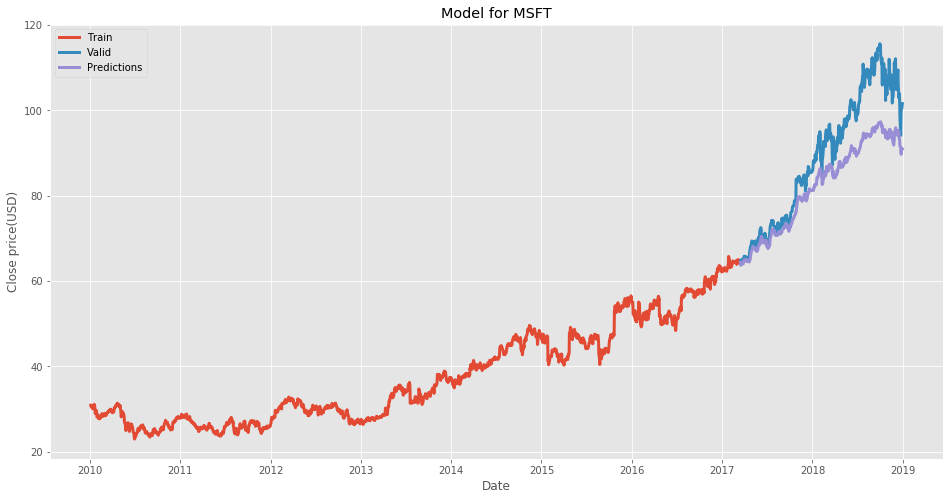

In [21]:
# Plot the data
train_plot = dataset[:training_data_len]
valid_plot = dataset[training_data_len:]
valid_plot["Predictions"] = y_pred

plt.style.use("ggplot")
plt.figure(figsize=(16,8))
plt.title("Model for "+ticker)
plt.xlabel("Date")
plt.ylabel("Close price(USD)")
plt.plot(train_plot["Close"], linewidth=3)
plt.plot(valid_plot[["Close","Predictions"]], linewidth=3)
plt.legend(["Train", "Valid", "Predictions"])
plt.show()